In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [30]:
installs = pd.read_csv('installs.csv')

In [55]:
installs.dtypes

created                object
application_id          int64
ref_type                int64
ref_hash                int64
click_hash            float64
attributed               bool
implicit                 bool
device_countrycode      int64
device_brand          float64
device_model          float64
session_user_agent     object
user_agent             object
event_uuid             object
kind                   object
wifi                   object
trans_id               object
ip_address              int64
device_language       float64
dtype: object

In [4]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18


Creo dos columnas, una con la fecha de la instalación y otra con la hora del día de la instalación

In [5]:
installs['date'] = pd.to_datetime(installs['created'], format='%Y%m%d %H:%M:%S.%f').dt.date

In [6]:
installs['hour'] = pd.to_datetime(installs['created'], format='%Y%m%d %H:%M:%S.%f').dt.hour

In [7]:
installs.head()

,created,application_id,ref_type,ref_hash,click_hash,attributed,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,date,hour
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,2019-03-13,1
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,NaN,False,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,2019-03-13,4
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,NaN,False,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,2019-03-13,4
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,NaN,False,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,2019-03-13,4
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,NaN,False,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,2019-03-10,22


# 0 ¿Hay columnas sin valores no nulos?

In [54]:
installs['click_hash'].isnull().all()

True

La columna click_hash no tiene valores no nulos, podemos prescindir de ella, es la única que se encontró sin valores no nulos

# 1 ¿Cuántas fechas hay?

In [9]:
cantidadPorDate = installs['date'].value_counts()
cantidadPorDate

2019-03-12    472
2019-03-13    423
2019-03-07    393
2019-03-11    377
2019-03-09    368
2019-03-08    366
2019-03-10    351
2019-03-05    337
2019-03-06    325
Name: date, dtype: int64

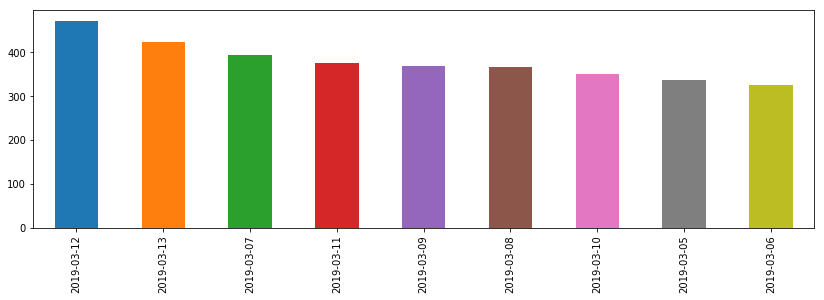

In [10]:
grafDate = cantidadPorDate.plot(kind = 'bar', figsize = (14,4))

1.a ¿Cómo fueron las installs a lo largo del tiempo?

Text(0,0.5,'Cantidad de eventos')

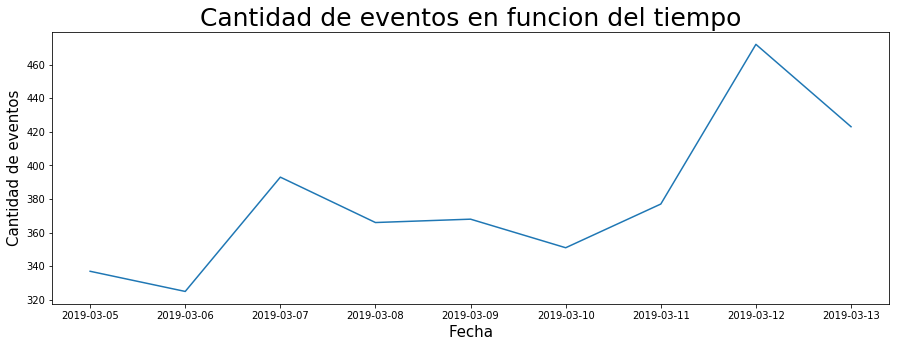

In [16]:
plt.figure(figsize=(15,5))
plot1 = sns.lineplot(x = cantidadPorDate.index, y = cantidadPorDate.values)
plot1.set_title("Cantidad de installs en funcion del tiempo", fontsize = 25)
plot1.set_xlabel("Fecha", fontsize = 15)
plot1.set_ylabel("Cantidad de installs", fontsize = 15)

1.b ¿Influye la hora del día en la cantidad de instalaciones?

In [18]:
cantidadPorHour = installs['hour'].value_counts()

Text(0,0.5,'Cantidad de installs')

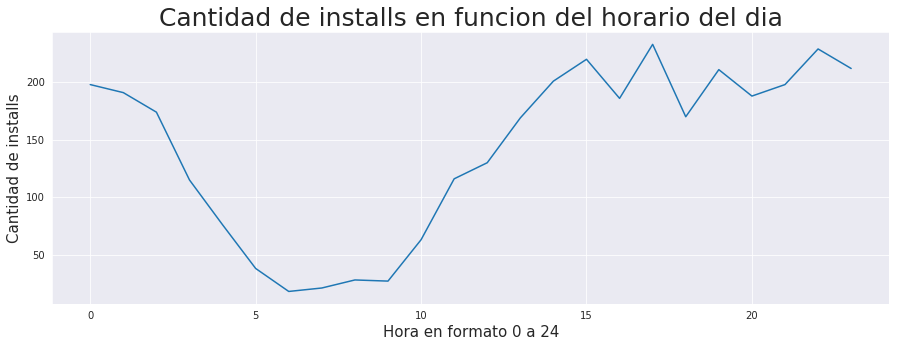

In [24]:
plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
plotH = sns.lineplot(x = cantidadPorHour.index, y = cantidadPorHour.values)
plotH.set_title("Cantidad de installs en funcion del horario del dia", fontsize = 25)
plotH.set_xlabel("Hora en formato 0 a 24", fontsize = 15)
plotH.set_ylabel("Cantidad de installs", fontsize = 15)

1.c Los horarios con menos installs son los horarios en los que la gente se suele levantar para estudiar. Los horarios las horas entre las 12 y las 14 se atribuyen al horaro del almuerzo. Llama la atención 

# 2 ¿Cuántas instalaciones son atribuidas a Jammp?

In [25]:
cantidadPorAttributed = installs['attributed'].value_counts()
installs['attributed'].value_counts()

False    3412
Name: attributed, dtype: int64

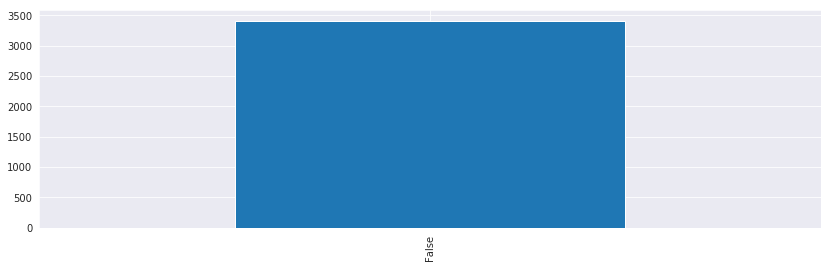

In [26]:
grafAttributed = cantidadPorAttributed.plot(kind = 'bar', figsize = (14,4))

Al parecer ninguna instalación de las disponibles es atribuida a Jammp

# 3 ¿Cuál es la brand con más y menos instalaciones?

In [8]:
cantidadPorBrands = installs['device_brand'].value_counts()

Primero veo las marcas con más instalaciones

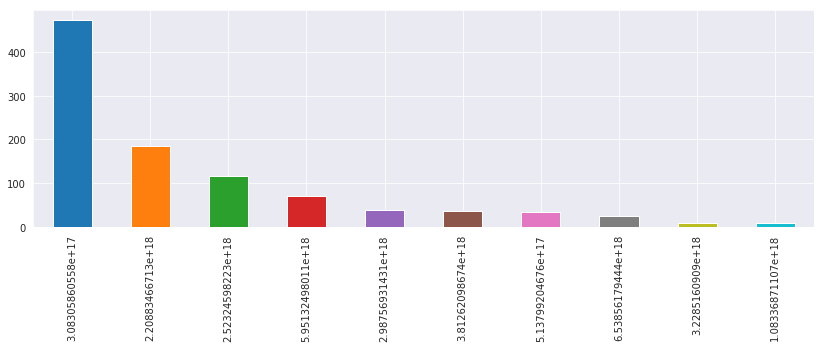

In [32]:
grafBrands = cantidadPorBrands.nlargest(10).plot(kind = 'bar', figsize = (14,4))

Ahora veo las que tienen menos

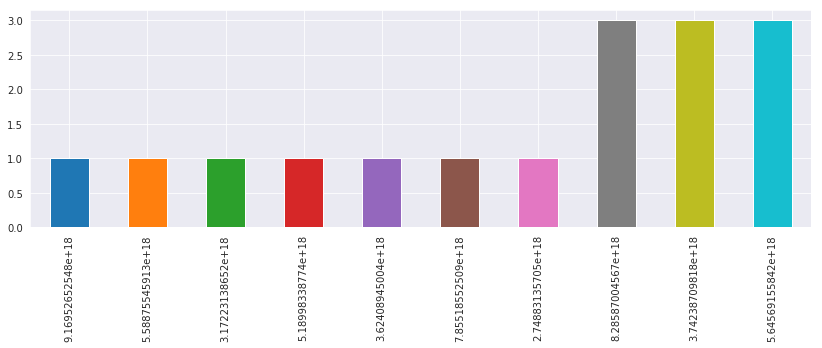

In [33]:
grafBrands = cantidadPorBrands.nsmallest(10).plot(kind = 'bar', figsize = (14,4))

# 4 ¿Cuál es el modelo con mayor y menor cantidad de instalaciones?

In [35]:
cantidadPorModel = installs['device_model'].value_counts()

Veo el que tiene más

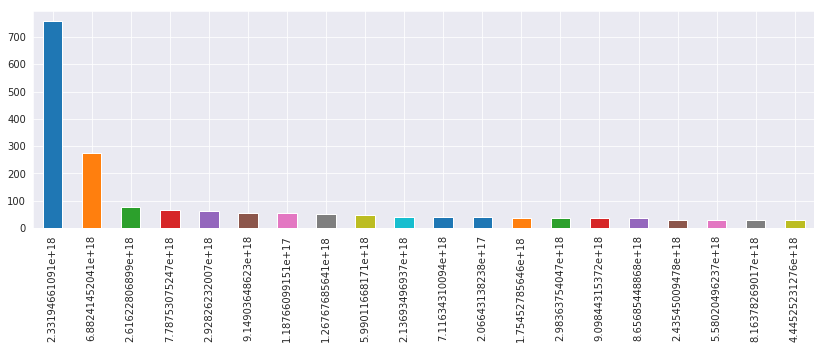

In [36]:
grafModel = cantidadPorModel.nlargest(20).plot(kind = 'bar', figsize = (14,4))

Se ve una amplia diferencia entre el modelo de código 2.331947e+18 y el 6.882415e+18, siendo el primero con más del doble de instalaciones que el segundo.

Ahora veo el modelo con menos instalaciones

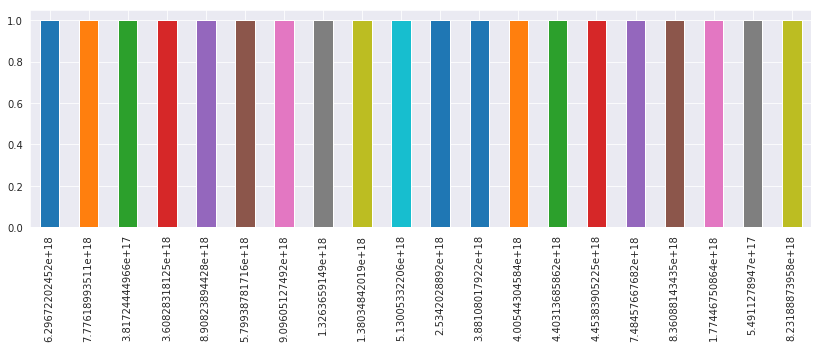

In [37]:
grafModel = cantidadPorModel.nsmallest(20).plot(kind = 'bar', figsize = (14,4))

No se pueden sacar conclusiones interesantes de esta pregunta, tanto para el mayor como para el menor, ya que no se tienen la cantidad de celulares con este modelo, entonces no se puede saber si el modelo con mayor cantidad de instalaciones es simplemente el modelo más usado por los usuarios

# 5 ¿Cuáles son las apps en relación a la cantidad de instalaciones?

In [45]:
cantidadPorAppId = installs['application_id'].value_counts()

Apps más instaladas

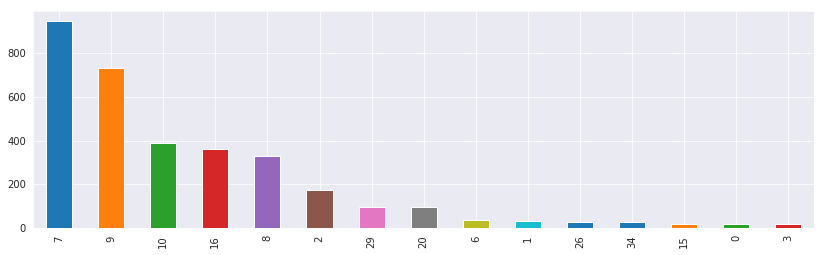

In [48]:
grafAppId = cantidadPorAppId.nlargest(15).plot(kind = 'bar', figsize = (14,4))

Las menos instaladas

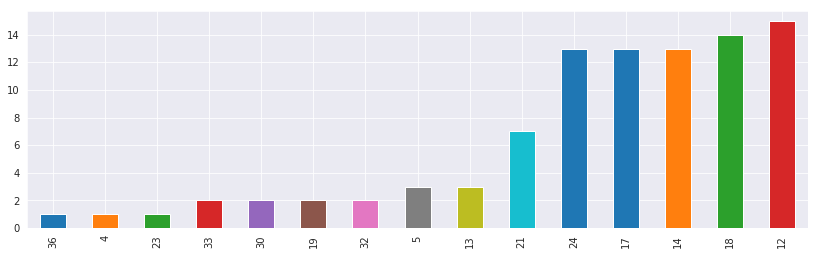

In [49]:
grafAppId = cantidadPorAppId.nsmallest(15).plot(kind = 'bar', figsize = (14,4))

# 6 ¿Podemos ver algo con el código de país?

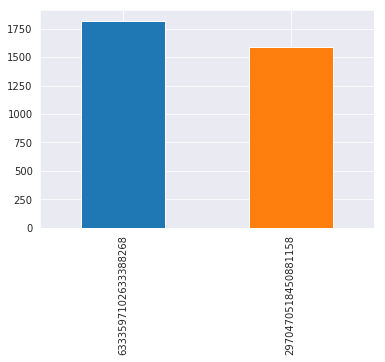

In [29]:
grafCountry = installs['device_countrycode'].value_counts().plot(kind = 'bar')

A simple vista no hay conclusiones interesantes sobre el código de país y la cantidad de instalaciones

# 7 ¿Cuántas instalaciones fueron hechas por dispositivos que no habían instalado nada previamente?

In [65]:
cantidadPorImplicit = installs['implicit'].value_counts()

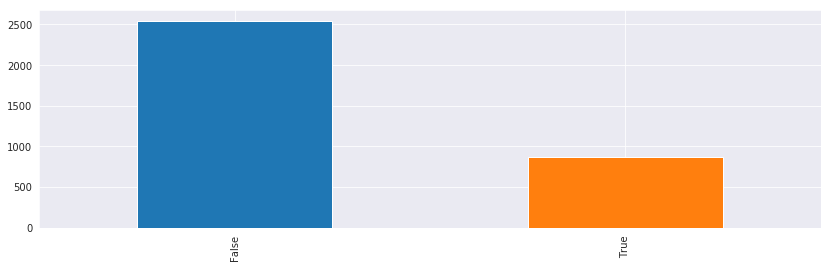

In [66]:
grafImplicit = cantidadPorImplicit.plot(kind = 'bar', figsize = (14,4))

# 8 ¿Cuál es la sesión de usuario con más instalaciones?

In [42]:
cantidadPorSession = installs['session_user_agent'].value_counts()

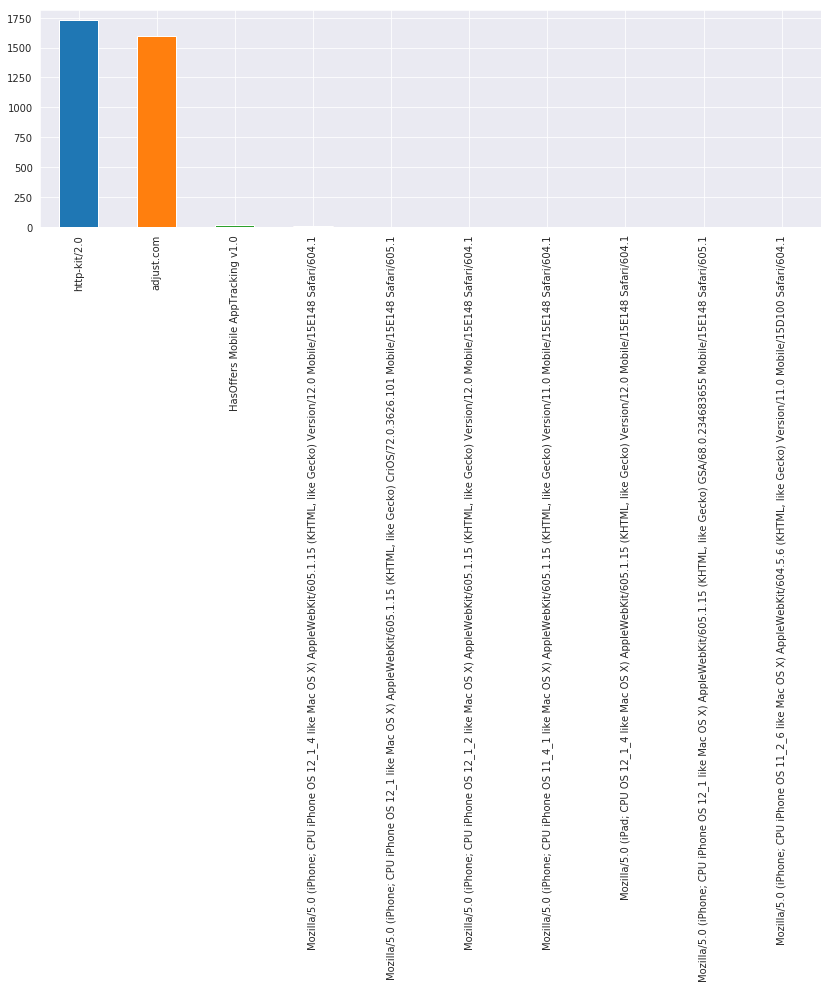

In [43]:
grafSession = cantidadPorSession.nlargest(10).plot(kind = 'bar', figsize = (14,4))

# 9 ¿Cuál es el user agent con más instalaciones?

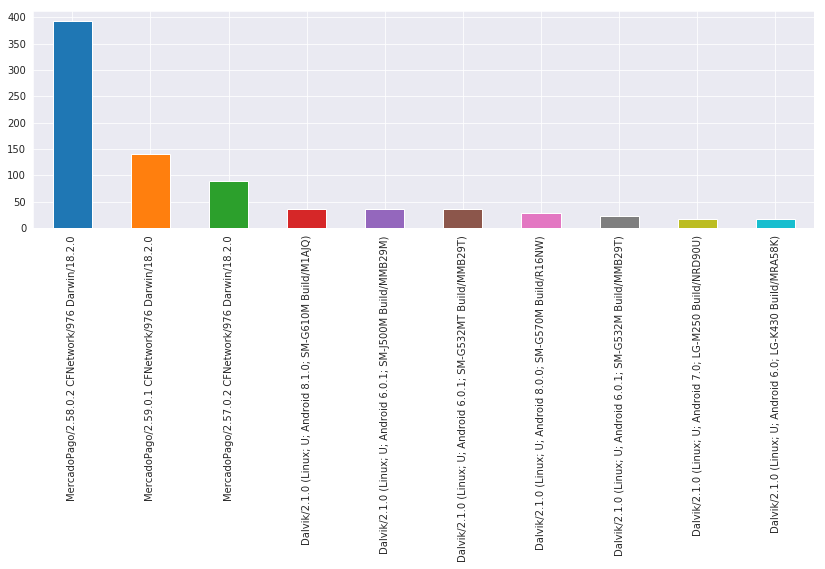

In [67]:
installs['user_agent'].value_counts().nlargest(10).plot(kind = 'bar', figsize = (14,4))